# Predicting U.S. Homelessness with Rent and Demographic Data

**Developed by: JC Dy**

In this project, we will be working with a dataset on hundreds of cities across the United States containing data on rent statistics since 2014. Information about the dataset can be found [at this link](https://www.apartmentlist.com/rentonomics/rental-price-data/).

In [4]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
rents = pd.read_csv("apartmentrent.csv")
rents.tail(10)

,Location,Location_Type,State,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
7145,"Elgin, SC",City,SC,Studio,717.0,706.0,705.0,707.0,708.0,708.0,...,779.0,784.0,791.0,792.0,785.0,776.0,780.0,784.0,788.0,783
7146,"Elgin, SC",City,SC,1br,905.0,892.0,891.0,892.0,894.0,894.0,...,984.0,989.0,998.0,999.0,991.0,980.0,985.0,990.0,995.0,989
7147,"Elgin, SC",City,SC,2br,1046.0,1030.0,1029.0,1031.0,1032.0,1033.0,...,1137.0,1143.0,1153.0,1154.0,1145.0,1132.0,1138.0,1144.0,1149.0,1142
7148,"Elgin, SC",City,SC,3br,1383.0,1362.0,1360.0,1363.0,1365.0,1365.0,...,1503.0,1511.0,1525.0,1526.0,1514.0,1496.0,1505.0,1512.0,1519.0,1511
7149,"Elgin, SC",City,SC,4br,1723.0,1697.0,1695.0,1698.0,1701.0,1701.0,...,1873.0,1883.0,1900.0,1902.0,1886.0,1864.0,1875.0,1884.0,1893.0,1882
7150,"Montgomery, TX",City,TX,Studio,825.0,820.0,818.0,818.0,824.0,NaN,...,NaN,659.0,649.0,633.0,603.0,571.0,624.0,643.0,656.0,615
7151,"Montgomery, TX",City,TX,1br,935.0,929.0,927.0,927.0,933.0,NaN,...,NaN,747.0,735.0,718.0,683.0,647.0,707.0,728.0,744.0,697
7152,"Montgomery, TX",City,TX,2br,1145.0,1137.0,1135.0,1134.0,1142.0,NaN,...,NaN,914.0,900.0,878.0,836.0,792.0,865.0,891.0,910.0,853
7153,"Montgomery, TX",City,TX,3br,1561.0,1550.0,1547.0,1546.0,1558.0,NaN,...,NaN,1246.0,1226.0,1198.0,1140.0,1080.0,1179.0,1215.0,1241.0,1162
7154,"Montgomery, TX",City,TX,4br,1983.0,1970.0,1966.0,1965.0,1979.0,NaN,...,NaN,1583.0,1559.0,1522.0,1448.0,1373.0,1499.0,1544.0,1577.0,1477


In [71]:
rents.groupby('State').agg('count').sort_values(by='Location', ascending=False).head()

,Location,Location_Type,Bedroom_Size,Price_2014_01,Price_2014_02,Price_2014_03,Price_2014_04,Price_2014_05,Price_2014_06,Price_2014_07,...,Price_2018_01,Price_2018_02,Price_2018_03,Price_2018_04,Price_2018_05,Price_2018_06,Price_2018_07,Price_2018_08,Price_2018_09,Price_2018_10
State,,,,,,,,,,,,,,,,,,,,,
CA,1135,1135,1135,1030,1030,1025,1065,1045,1030,1025,...,1080,1105,1095,1095,1110,1095,1115,1125,1130,1135
TX,570,570,570,540,540,535,540,530,535,505,...,515,545,550,560,565,565,570,570,570,570
FL,510,510,510,440,430,435,440,430,435,405,...,470,490,480,480,465,465,490,505,510,510
MI,490,490,490,435,435,435,430,385,430,345,...,295,380,415,445,445,455,455,455,475,490
IL,345,345,345,310,305,305,315,315,310,310,...,295,320,335,335,335,335,335,340,340,345


In [72]:
# From above, we know the top 16 states we have most data on
top_states = ['CA', 'TX', 'FL', 'MI', 'IL', 'GA', 'OH', 'MA', 'MD', 'PA', 'NC', 'WA', 'VA', 'IN', 'NJ', 'NY']

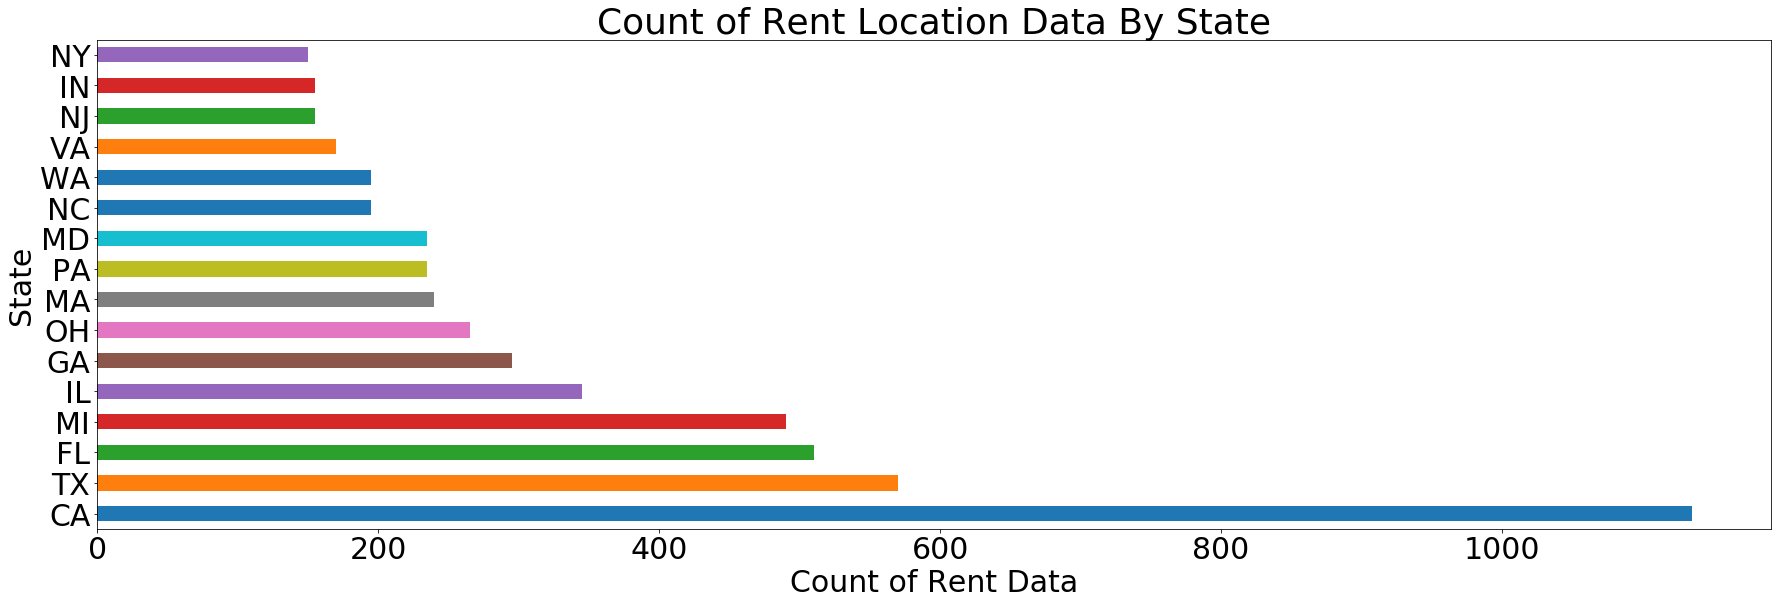

In [73]:
plt.figure(figsize=(30,9))
ax = rents[rents['State'].isin(top_states)]['State'].value_counts().plot(kind='barh')
ax.set_ylabel("State")
ax.set_xlabel("Count of Rent Data")
ax.set_title("Count of Rent Location Data By State");
plt.rcParams.update({'font.size': 30})

In [61]:
num_states = len(rents.groupby(rents['State']))
state_list = set(rents['State'].tolist())

## Submission

You're done! 

Before submitting this assignment, ensure to:

1. Restart the Kernel (in the menubar, select Kernel->Restart & Run All)
2. Validate the notebook by clicking the "Validate" button

Finally, make sure to **submit** the assignment via the Assignments tab in Datahub